In [1]:
!pip install pandas numpy matplotlib scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  

In [35]:
# 手动输入数据
data = [
    [137.97, 3, 145.00],
    [104.50, 2, 110.00],
    [100.00, 2, 93.00],
    [124.32, 3, 116.00],
    [79.20, 1, 65.32],
    [99.00, 2, 104.00],
    [124.00, 3, 118.00],
    [114.00, 2, 91.00],
    [106.69, 2, 62.00],
    [138.05, 3, 133.00],
    [53.75, 1, 51.00],
    [46.91, 1, 45.00],
    [68.00, 1, 78.50],
    [63.02, 1, 69.65],
    [81.26, 2, 75.69],
    [86.21, 2, 95.30]
]

In [ ]:
# 创建DataFrame
df = pd.DataFrame(data, columns=['面积', '房间数', '销售价格'])
df  # 打印数据dataframe格式

,面积,房间数,销售价格
0,137.97,3,145.00
1,104.50,2,110.00
2,100.00,2,93.00
3,124.32,3,116.00
4,79.20,1,65.32
5,99.00,2,104.00
6,124.00,3,118.00
7,114.00,2,91.00
8,106.69,2,62.00
9,138.05,3,133.00


In [37]:
# 特征和标签
X = df[['面积', '房间数']]
y = df['销售价格']

In [ ]:
# 数据标准化
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

In [ ]:
# 模型训练
model = LinearRegression() 
model.fit(X_scaled, y) 

LinearRegression()

In [40]:
# 预测
y_pred = model.predict(X_scaled)  

In [ ]:
# 模型评估（R²分数和均方误差）
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f'R²分数: {r2:.4f}')
print(f'均方误差(MSE): {mse:.2f}')

R²分数: 0.7979
均方误差(MSE): 159.74


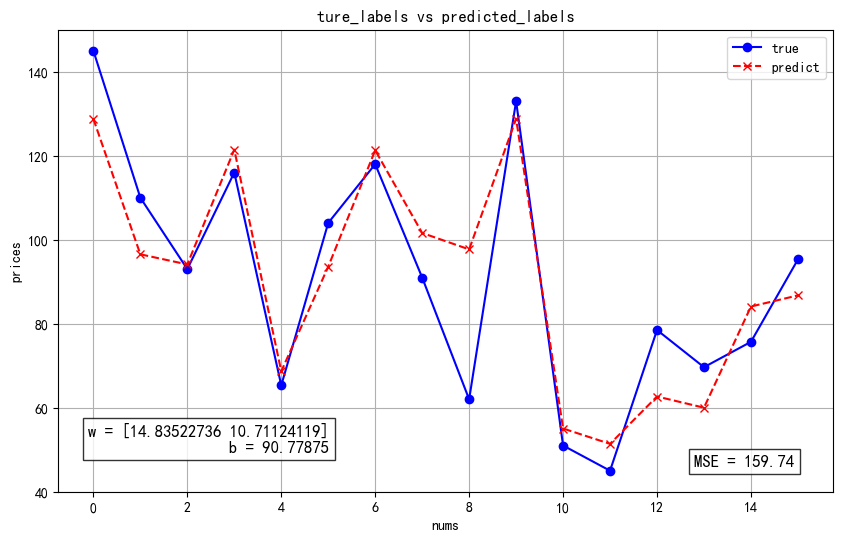

In [ ]:
# 真实预测比较
plt.figure(figsize=(10, 6))
plt.plot(range(len(y)), y, label='true', marker='o', linestyle='-', color='blue')
plt.plot(range(len(y)), y_pred, label='predict', marker='x', linestyle='--', color='red')
plt.xlabel('nums')
plt.ylabel('prices')
plt.title('ture_labels vs predicted_labels')
plt.legend()
plt.grid(True)
plt.text(
    x=0.95,       
    y=0.05,    
    s=f'MSE = {mse:.2f}', 
    ha='right', 
    va='bottom',  
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)
plt.text(
    x=0.35,
    y=0.08,
    s=f'w = {model.coef_}\nb = {model.intercept_}',
    ha='right',
    va='bottom', 
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8) 
)
plt.show()

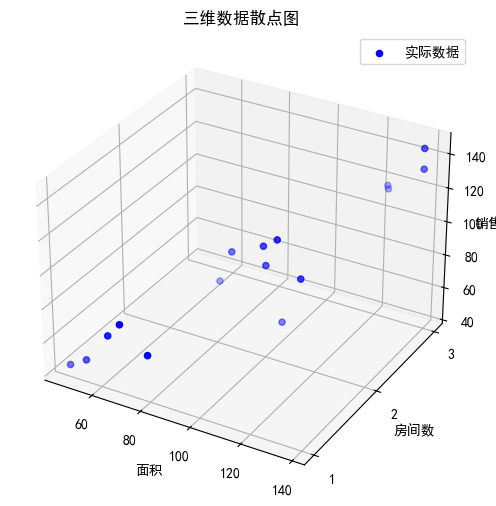

In [ ]:
# 三维散点图
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(df['面积'], df['房间数'], df['销售价格'], c='blue', marker='o', label='实际数据')
ax1.set_xlabel('面积')
ax1.set_ylabel('房间数')
ax1.set_zlabel('销售价格')
ax1.set_title('三维数据散点图')
ax1.set_yticks([1, 2, 3])
ax1.legend()
plt.show()

d:\MiniConda\envs\ML\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


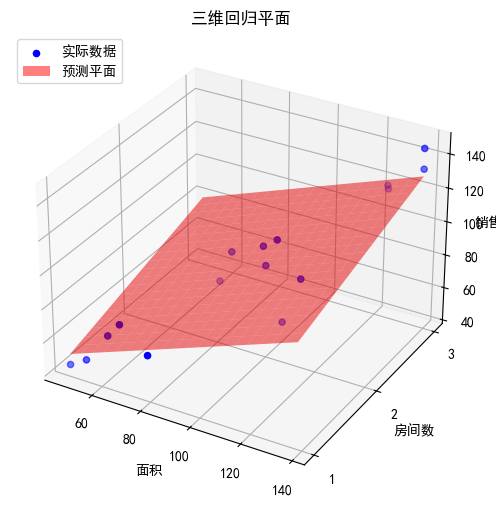

In [ ]:
# 三维回归平面图
fig2 = plt.figure(figsize=(10, 6))
ax2 = fig2.add_subplot(111, projection='3d')

area_min, area_max = df['面积'].min(), df['面积'].max()
room_min, room_max = df['房间数'].min(), df['房间数'].max()

area_grid = np.linspace(area_min, area_max, 20)
room_grid = np.linspace(room_min, room_max, 20)
area_mesh, room_mesh = np.meshgrid(area_grid, room_grid)

X_grid = np.column_stack([area_mesh.ravel(), room_mesh.ravel()])
X_grid_scaled = scaler.transform(X_grid)
y_grid_pred = model.predict(X_grid_scaled).reshape(area_mesh.shape)

surf = ax2.plot_surface(area_mesh, room_mesh, y_grid_pred, alpha=0.5, color='red', label='预测平面')
scatter = ax2.scatter(df['面积'], df['房间数'], df['销售价格'], c='blue', marker='o', label='实际数据')

from matplotlib.patches import Rectangle
proxy_surf = Rectangle((0, 0), 1, 1, fc='red', alpha=0.5)
ax2.legend([scatter, proxy_surf], ['实际数据', '预测平面'], loc='upper left')

ax2.set_xlabel('面积')
ax2.set_ylabel('房间数')
ax2.set_zlabel('销售价格')
ax2.set_yticks([1, 2, 3])  # 房间数为整数
ax2.set_title('三维回归平面')
plt.show()
